In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
sns.set()

pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns',100)

# Limpeza e organização dos dados

In [33]:
df_form1 = pd.read_excel('dataset/formulario1.xlsx')
df_form1['bad_smell'] = df_form1['bad_smell'].str.lower().replace({"long method": "Long Method",
                           "métodos longos": "Long Method",
                           "método grande": "Long Method",
                           "longo método": "Long Method",
                           "método longo": "Long Method",
                           "método longo": "Long Method",
                           "método longo, muitos comentários":"Long Method",
                           "duplicade code":"Duplicade Code",
                           "código duplicado":"Duplicade Code",
                           "duplicated code":"Duplicade Code",
                           "codigo duplicado":"Duplicade Code",
                           "código duplicado,":"Duplicade Code",
                           "código duplicado + outro":"Duplicade Code",
                           "complexidade ciclomática": "Complexidade Ciclomática",
                           "método longo com grande complexidade ciclomatica":"Complexidade Ciclomática",
                           "método longo com grande complexidade ciclomatica, método invejoso":"Complexidade Ciclomática",
                           "grande complexidade ciclomática":"Complexidade Ciclomática",
                           "relativa complexidade ciclomática":"Complexidade Ciclomática",
                           "classe grande, muitos comentários": "Long Class",
                           "classe grande":"Long Class",
                           "classe longa":"Long Class",
                           "long class":"Long Class",
                           "god class":"God Class",
                           "god method":"God Method",
                           "longa lista de parâmetros":"Long Parameter List",
                           "métodos com muitos parâmetros":"Long Parameter List",
                           "método com muitos parâmetros":"Long Parameter List",
                           "long parameter list":"Long Parameter List",
                           "longa lista de parametros":"Long Parameter List",
                           "muitos parâmetros":"Long Parameter List",
                           "classe de dados":"Data Class",
                           "switch":"Switch",
                           "switch case":"Switch",
                           "uso indevido de switch":"Switch",
                           "switch statement":"Switch",
                           "método invejoso":"Envy",
                           "envy class":"Envy",
                           "sem valor": "No Value",
                           "nome do método pode ser melhor": "No Value",
                           "não utilização de padrão de nomenclatura": "No Value",
                           "se algo no cliente for alterado + precisará alterar em diversos arquivos + códigos semelhantes.": "No Value"})
display(df_form1['bad_smell'].unique())


df_form1['classe'] = df_form1['classe'].replace({
    "AGENCIA":"Agencia",
    "Agência":"Agencia",
    "agencia":"Agencia",
    "EMPRESA":"Empresa",
    "carteira":"Carteira"
})
display(df_form1['classe'].unique())
display(df_form1)

array(['Long Method', 'Duplicade Code', 'Complexidade Ciclomática',
       'Long Class', 'No Value', 'God Class', 'God Method',
       'Long Parameter List', 'Data Class', 'Switch', 'Envy'],
      dtype=object)

array(['Agencia', 'Carteira', 'Empresa', 'Climas', 'Estacao', 'Cliente',
       'Destino', 'sem valor'], dtype=object)

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
0,Thiago Abreu Lopes,469845,15:54:00,15:59:00,Agencia,AgendaViagem,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores\n,"Sim, a longo prazo pode vir a ser um problema ...",Fácil,Muita Certeza
1,Thiago Abreu Lopes,469845,15:59:00,16:01:00,Agencia,agendaViagemParaEstacao,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores,"Sim, a longo prazo pode vir a ser um problema ...",Intermediário,Intermediário
...,...,...,...,...,...,...,...,...,...,...,...,...
284,Vinicius Tabosa dos Santos,472107,16:14:00,16:19:00,Agencia,agendaViagemParaEstado,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário
285,Vinicius Tabosa dos Santos,472107,16:14:00,16:19:00,Agencia,agendaViagem2,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário


In [37]:
df_form2 = pd.read_excel('dataset/feedback.xlsx')
df_form2['3_Entendimento_Bad_Smells'].replace({'Baixo\n':'Baixo'},inplace=True)
df_form2

,Nome,Matricula,Horario_Inicio,1_Entendimento_Java,2_Entendimento_OO,3_Entendimento_Bad_Smells,4_BadSmells_Prejudiciais,5_Atributos_Qualidade,¨6_Atributos_Mais_Importantes,7_Complexidade_Ciclomatica,8_Codigo_Duplicado,9_Classe_Grande,10_Metodo_Grande,11_Muitos_Paramentos,12_Metodo_invejoso,13_refatoracao,14_cite_atributos,Horario_Fim
0,Thiago Abreu Lopes,469845,16:50:00,Intermediário,Intermediário,Bom,"Métodos Longos, Métodos com muitos parâmetros,...",Intermediário,"Inteligibilidade,Modularização",5,4,4,5,4,4,5,Grau de Acoplamento e Grau de Coesão do código...,16:55:00
1,Akyla de Aquino Pinto,412723,15:40:00,Intermediário,Bom,Intermediário,NaN,Bom,NaN,4,5,5,5,3,3,5,Testes com Mutantes e A divisão de classes e m...,16:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Thainara Penha de Sousa,427867,17:41:00,Baixo,Baixo,Intermediário,NaN,Baixo,NaN,3,5,5,5,5,5,5,sem valor,17:45:00
27,Vinicius Tabosa dos Santos,472107,16:59:00,Intermediário,Baixo,Intermediário,"Métodos Longos, Classe Invejosa, Shotgun Surgery",Intermediário,Modularização,5,4,4,5,3,3,4,sem valor,17:02:00


In [38]:
df_form2['4_BadSmells_Prejudiciais'] = df_form2['4_BadSmells_Prejudiciais'].fillna("No Value")
text_list = list(df_form2['4_BadSmells_Prejudiciais'])
all_bad_smells = []
for text in text_list:
    all_bad_smells.extend(text.split(','))
bad_smells = pd.DataFrame(all_bad_smells,columns=['bad smell'])
bad_smells['bad smell'].replace({
    " Métodos com muitos parâmetros":"Métodos com muitos parâmetros",
    "  Shotgun Surgery ":"Shotgun Surgery",
    " Shotgun Surgery ":"Shotgun Surgery",
    " Métodos Longos": "Métodos Longos",
    " Classes Grandes":"Classes Grandes",
    " Classe Invejosa":"Classe Invejosa",
    " Método Invejoso":"Método Invejoso"
},inplace=True)
display(bad_smells['bad smell'].unique())

df_form2['¨6_Atributos_Mais_Importantes'] = df_form2['¨6_Atributos_Mais_Importantes'].fillna("No Value")
text_list = list(df_form2['¨6_Atributos_Mais_Importantes'])
all_atributos = []
for text in text_list:
    all_atributos.extend(text.split(','))
atributos = pd.DataFrame(all_atributos,columns=['atributos'])
atributos['atributos'].replace({
    " Modularização": "Modularização",
    " Continuidade":"Continuidade",
    " Testabilidade": "Testabilidade",
    " Estruturação do código":"Estruturação do código"
},inplace=True)
display(atributos['atributos'].unique())

array(['Métodos Longos', 'Métodos com muitos parâmetros',
       'Shotgun Surgery', 'No Value', 'Código duplicado',
       'Classes Grandes', 'Classe Invejosa', 'Método Invejoso'],
      dtype=object)

array(['Inteligibilidade', 'Modularização', 'No Value', 'Continuidade',
       'Estruturação do código', 'Testabilidade'], dtype=object)

# Visualização feedback

## Gráfico de pizza

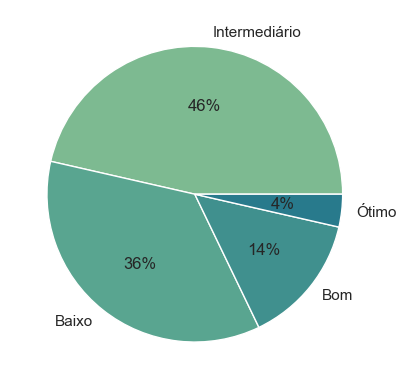

In [6]:
def pie(column_name):
    data = df_form2[column_name].value_counts().reset_index()
    colors = sns.color_palette('crest')[0:4] 

    plt.pie(data[column_name],labels=data['index'],colors = colors, autopct='%.0f%%')
    plt.show()

pie('1_Entendimento_Java')
# pie('2_Entendimento_OO')
# pie('3_Entendimento_Bad_Smells')
# pie('5_Atributos_Qualidade')

# colors = sns.color_palette('Blues')[0:4]
# colors = sns.color_palette('Spectral')[0:4]
#colors = sns.color_palette('husl')[0:4]


## Gráfico de barras

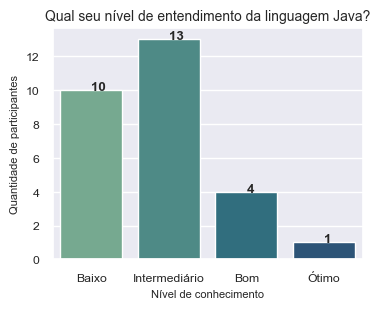

In [7]:
def bar(column_name,titulo):
    sns.set_style("whitegrid")
    sns.set(font_scale=0.8)
    bar,ax = plt.subplots(figsize=(4,3))
    ax = sns.countplot(x=df_form2[column_name],  palette="crest",orient='v', order=['Baixo',"Intermediário",'Bom',"Ótimo"])
    ax.set_title(titulo, fontsize=10)
    ax.set_ylabel("Quantidade de participantes", fontsize=8)
    ax.set_xlabel("Nível de conhecimento", fontsize=8)
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.f"% rect.get_height(), weight='bold' )

bar("1_Entendimento_Java","Qual seu nível de entendimento da linguagem Java?")
# bar('2_Entendimento_OO',"Qual seu nível de entendimento no paradigma de orientação a objetos?")
# bar('3_Entendimento_Bad_Smells','Qual seu nível de entendimento a respeito do conteúdo de Bad Smells?')
# bar('5_Atributos_Qualidade',"Qual seu nível de entendimento a respeito dos atributos de qualidade de software?")
#Adiciona o "Nenhum"??

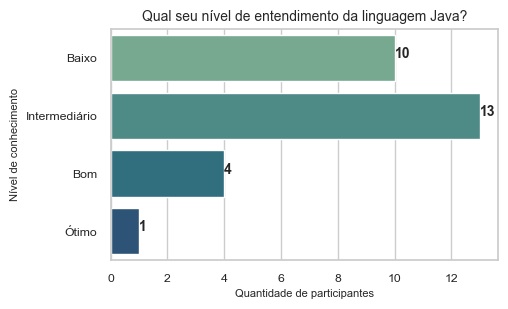

In [8]:
def barh(column_name,titulo):
    sns.set(font_scale=0.8)
    data = df_form2[column_name].value_counts().reset_index()
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(5,3))
    ax = sns.barplot(x=column_name, y='index', data=data, errorbar=None, palette="crest",orient='h',order=['Baixo',"Intermediário",'Bom',"Ótimo"])
    ax.set_title(titulo, fontsize=10)
    ax.set_xlabel("Quantidade de participantes", fontsize=8)
    ax.set_ylabel("Nível de conhecimento", fontsize=8)
    for rect in ax.patches:
        ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.f"% rect.get_width(), weight='bold', fontsize=10)
    bar.savefig("Seaborn_Bar_Vertical.png")
barh("1_Entendimento_Java","Qual seu nível de entendimento da linguagem Java?")
# barh('2_Entendimento_OO',"Qual seu nível de entendimento no paradigma de orientação a objetos?")
# barh('3_Entendimento_Bad_Smells','Qual seu nível de entendimento a respeito do conteúdo de Bad Smells?')
# barh('5_Atributos_Qualidade',"Qual seu nível de entendimento a respeito dos atributos de qualidade de software?")

In [9]:
df_form2['1_Entendimento_Java'].value_counts().reset_index()

,index,1_Entendimento_Java
0,Intermediário,13
1,Baixo,10
2,Bom,4
3,Ótimo,1


In [10]:
data = df_form2['1_Entendimento_Java'].value_counts().reset_index()
data2 = df_form2['2_Entendimento_OO'].value_counts().reset_index()
data3 = df_form2['3_Entendimento_Bad_Smells'].value_counts().reset_index()
data4 = df_form2['5_Atributos_Qualidade'].value_counts().reset_index()

data = pd.merge(data,data2[["index", "2_Entendimento_OO"]],how="left", on="index")
data = pd.merge(data,data3[["index", "3_Entendimento_Bad_Smells"]],how="left", on="index")
data = pd.merge(data,data4[["index", "5_Atributos_Qualidade"]],how="left", on="index")

data = data.T
header = data.iloc[0]
data.columns = data.iloc[0]
data = data.drop(labels=['index'],axis=0).reset_index()

display(data)

index,index,Intermediário,Baixo,Bom,Ótimo
0,1_Entendimento_Java,13,10,4,1
1,2_Entendimento_OO,8,9,9,2
2,3_Entendimento_Bad_Smells,12.0,7.0,9.0,NaN
3,5_Atributos_Qualidade,12.0,9.0,7.0,NaN


(array([0, 1, 2, 3]),
 [Text(0, 0, '1_Entendimento_Java'),
  Text(1, 0, '2_Entendimento_OO'),
  Text(2, 0, '3_Entendimento_Bad_Smells'),
  Text(3, 0, '5_Atributos_Qualidade')])

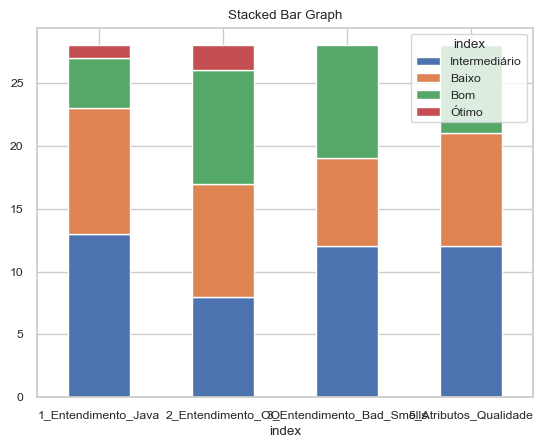

In [11]:
colors = sns.color_palette('crest')[0:4] 
data.plot( 
    x = 'index', 
    kind = 'bar', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 
plt.xticks(rotation=360)


Text(0.5, 1.0, 'Conhecimento Técnico dos Participantes')

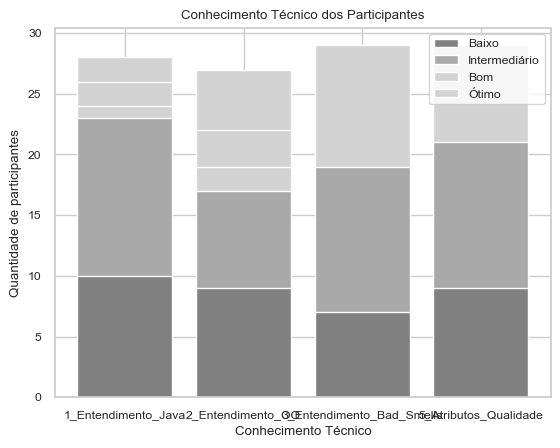

In [12]:
plt.bar(data['index'], data['Baixo']+1, color='#808080') 
plt.bar(data['index'], data['Intermediário']+1, bottom=data['Baixo'], color='#A9A9A9') 
plt.bar(data['index'], data['Bom']+1, bottom=data['Intermediário']+data['Baixo'], color='#D3D3D3')
plt.bar(data['index'], data['Ótimo']+1, bottom=data['Intermediário']+data['Baixo']+data['Ótimo'], color='#D3D3D3')

plt.xlabel("Conhecimento Técnico") 
plt.ylabel("Quantidade de participantes") 
plt.legend(["Baixo", "Intermediário", "Bom","Ótimo"])
plt.title("Conhecimento Técnico dos Participantes") 
#plt.show() 

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_16196\2875280895.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(['index'])['Intermediário', 'Baixo', 'Bom','Ótimo'].sum()


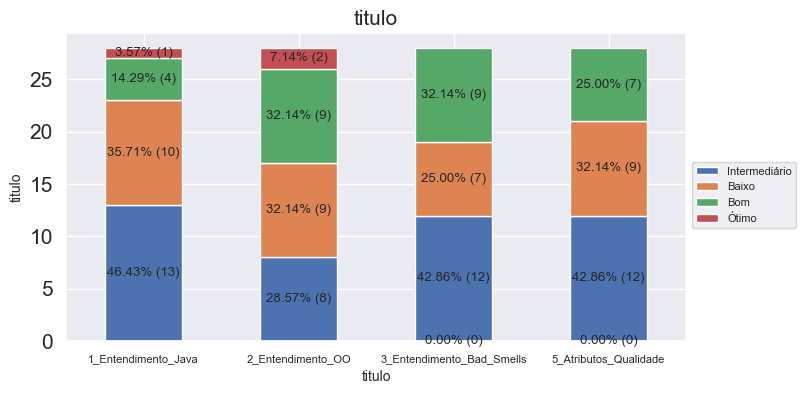

In [32]:
sns.set(font_scale=0.8)
df = data.groupby(['index'])['Intermediário', 'Baixo', 'Bom','Ótimo'].sum()
ax = df.plot.bar(figsize=(8,4), stacked=True)

ax.set_title('titulo', fontsize=15)  # Titulo de la grafica
ax.set_ylabel('titulo', fontsize=10) # Titulo eje y
ax.set_xlabel('titulo', fontsize=10) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=8) #ubicación leyenda
ax.tick_params(axis="x", rotation=90, labelsize=8)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)
plt.xticks(rotation=360)

abs_values = df.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({int(abs_value)})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
plt.show()

## Classificação

Agencia - Código duplicado, métodos longos, classe grande, longa lista de parametros

Carteira - Código duplicado, métodos longos, classe grande

Cidade - Nenhum

Cliente - Nenhum

Destino - longa lista de parametros

Empresa - Código duplicado

Pessoa - Nenhum 

## Contagem de citações de Bad Smells e Atributos de Qualidade de Software

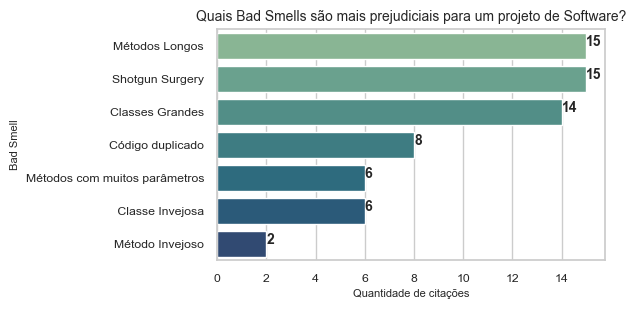

In [103]:
all_bs = []
for bs in list(df_form2['4_BadSmells_Prejudiciais']):
    all_bs.extend(bs.split(','))

bs = pd.DataFrame(all_bs,columns=['Bad Smells'])

bs['Bad Smells'] = bs['Bad Smells'].replace({
    '  Shotgun Surgery ':  "Shotgun Surgery",
    ' Métodos Longos': 'Métodos Longos',
    ' Shotgun Surgery ':'Shotgun Surgery',
    ' Classes Grandes':'Classes Grandes',
    ' Método Invejoso':'Método Invejoso',
    ' Métodos com muitos parâmetros':'Métodos com muitos parâmetros'
})

data = bs['Bad Smells'].value_counts().reset_index()
data = data[data['index']!='No Value']

column_name = 'Bad Smells'
sns.set(font_scale=0.8)
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(x=column_name, y='index', data=data, errorbar=None, palette="crest")
ax.set_title("Quais Bad Smells são mais prejudiciais para um projeto de Software?", fontsize=10)
ax.set_xlabel("Quantidade de citações", fontsize=8)
ax.set_ylabel("Bad Smell", fontsize=8)
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.f"% rect.get_width(), weight='bold', fontsize=10)

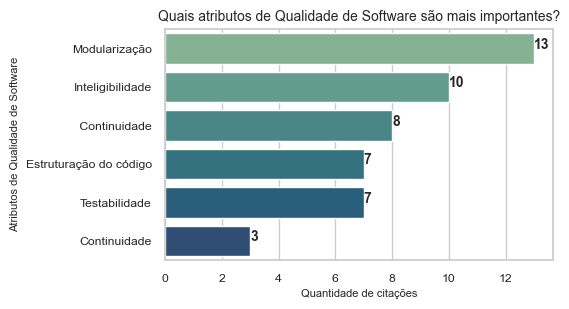

In [104]:
all_at = []
for at in list(df_form2['¨6_Atributos_Mais_Importantes']):
    all_at.extend(at.split(','))

at = pd.DataFrame(all_at,columns=['Atributo'])
at['Atributo'] = at['Atributo'].replace({
    ' Modularização':'Modularização',
    ' Testabilidade':'Testabilidade',
    ' Estruturação do código':'Estruturação do código'
})

data = at['Atributo'].value_counts().reset_index()
data = data[data['index']!='No Value']

column_name = 'Atributo'
sns.set(font_scale=0.8)
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(x=column_name, y='index', data=data, errorbar=None, palette="crest")
ax.set_title("Quais atributos de Qualidade de Software são mais importantes?", fontsize=10)
ax.set_xlabel("Quantidade de citações", fontsize=8)
ax.set_ylabel("Atributos de Qualidade de Software", fontsize=8)
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.f"% rect.get_width(), weight='bold', fontsize=10)